### Creating Visual Graphs to see the patterns

In [2]:
#Dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps
import gmaps.datasets

In [7]:
#path to files
hp_and_rent = "Data/hp_and_rent_grouped.csv"
hp_and_rent_df = pd.read_csv(hp_and_rent, encoding='utf8', engine='python')
hp_and_rent_df.head()

,Neighborhood,Year,Assessed Land Value,Pct Change,Yearly Rent Price,Avg Price Per Year,Lat,Lng
0,Bayview,2013.5,190512.858289,4.170000,35644.333333,37087.571429,37.730416,-122.384424
1,Bernal Heights,2013.5,268491.454817,6.726667,43599.666667,45048.428571,37.738950,-122.415201
2,Buena Vista,2013.5,487987.841867,5.866667,53112.333333,54370.142857,37.806505,-122.420778
3,Corona Heights,2013.5,394108.123417,4.850000,52034.000000,53150.428571,37.761812,-122.443185
4,Cow Hollow,2013.5,614482.066967,5.825000,63147.833333,64405.571429,37.798033,-122.439646


Text(0.5,1,'Average Rent Rate (per Neigborhood)')

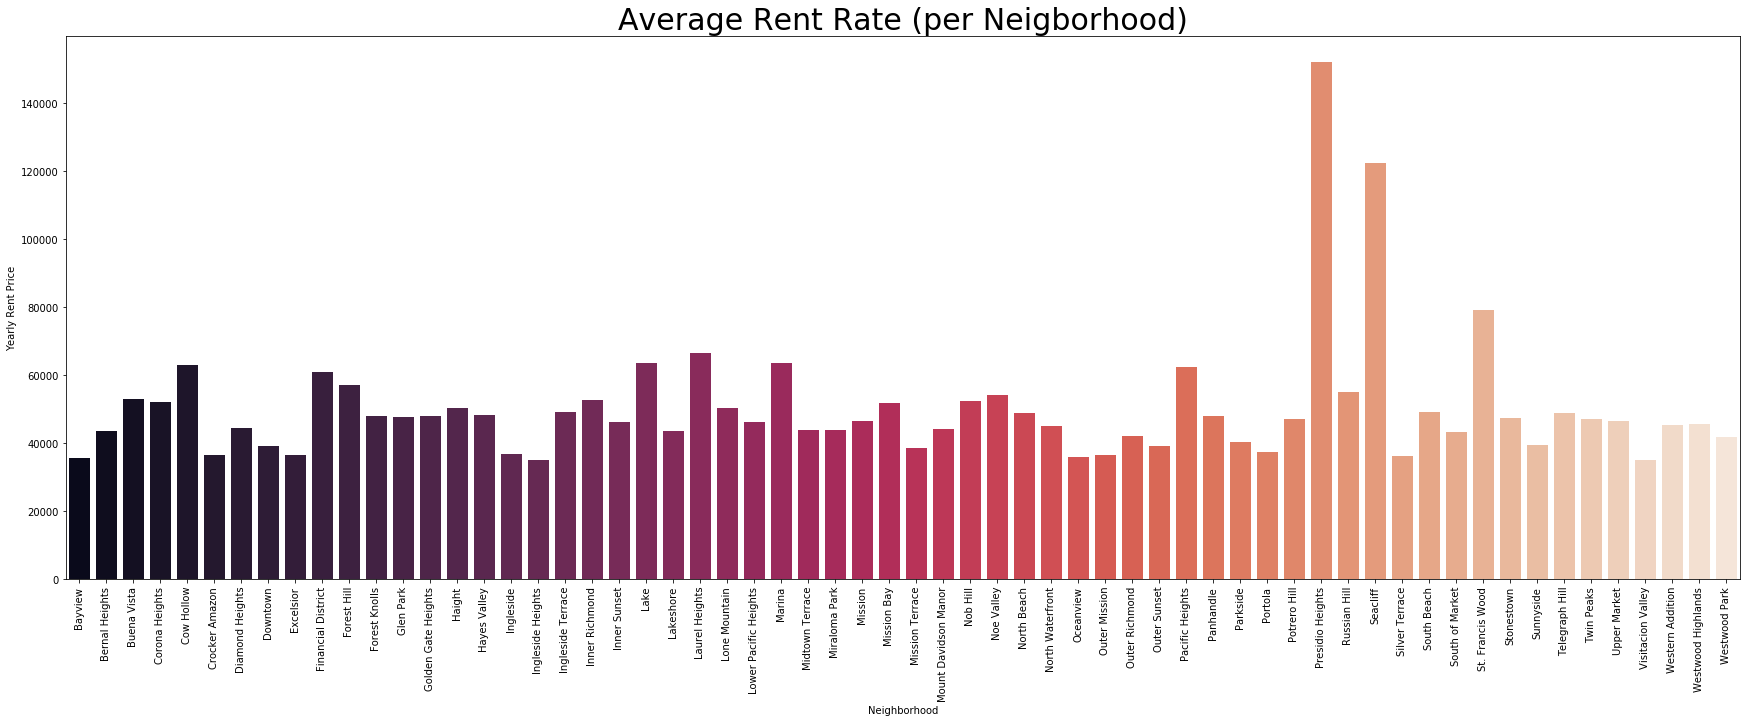

In [9]:
#Using Seaborn to create a graph that will show Average Rent Rate (per Neigborhood)
plot = plt.subplots(figsize=(30, 10))
sns.barplot(x = hp_and_rent_df["Neighborhood"], y = hp_and_rent_df["Yearly Rent Price"], palette="rocket")
plt.xticks(rotation=90)
plt.title("Average Rent Rate (per Neigborhood)", fontsize=30)


[]

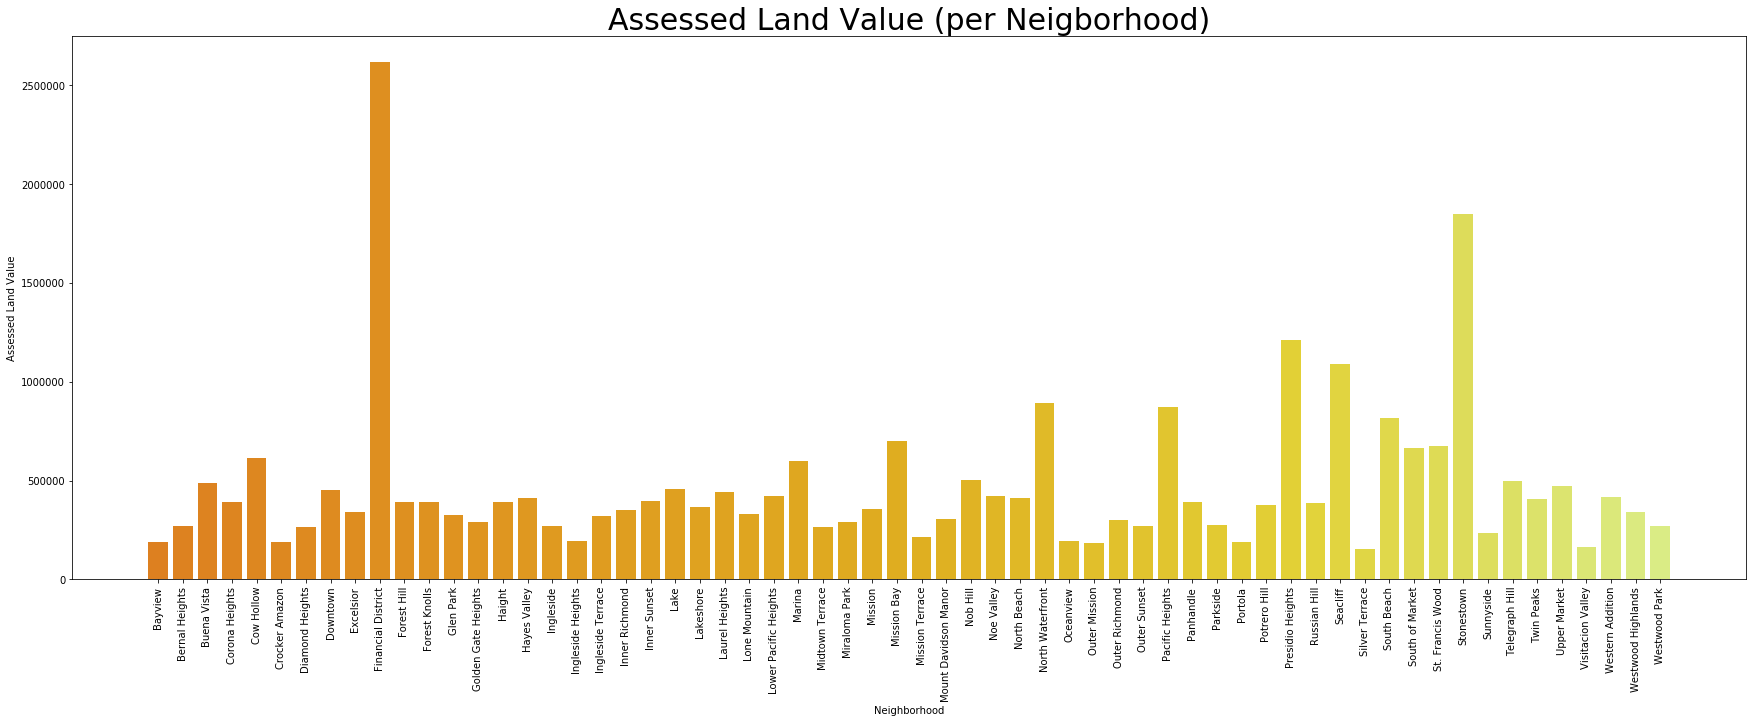

In [11]:
#Using Seaborn to create a graph that will show Assessed Land Value (per Neigborhood)
plot2 = plt.subplots(figsize=(30, 10))
sns.barplot(x = hp_and_rent_df["Neighborhood"], y = hp_and_rent_df["Assessed Land Value"], palette="Wistia_r")
plt.xticks(rotation=90)
plt.title("Assessed Land Value (per Neigborhood)", fontsize=30)
plt.plot()

In [12]:
#Importing csv file 
yearly_price_change_path = "Data/hp_and_rent.csv"
yearly_price_change = pd.read_csv(yearly_price_change_path, encoding='utf8', engine='python')
yearly_price_change.head()

,Unnamed: 0,Neighborhood,Year,Assessed Land Value,Pct Change,Yearly Rent Price,Avg Price Per Year,City,Lat,Lng
0,0,Bayview,2011,175691.806133,0.14,30723,37087.571429,San Francisco,37.730416,-122.384424
1,1,Bayview,2012,177818.914467,1.21,28821,37087.571429,San Francisco,37.730416,-122.384424
2,2,Bayview,2013,182203.741400,2.47,30433,37087.571429,San Francisco,37.730416,-122.384424
3,3,Bayview,2014,185691.451367,1.91,35338,37087.571429,San Francisco,37.730416,-122.384424
4,4,Bayview,2015,198571.039233,6.94,42870,37087.571429,San Francisco,37.730416,-122.384424


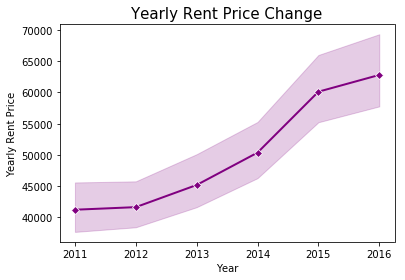

In [14]:
#Creating a graph that will show yearly change in  rent price 
sns.lineplot(x = yearly_price_change["Year"], y = yearly_price_change["Yearly Rent Price"], 
             marker ='D', linewidth=2, color = "purple")
plt.title("Yearly Rent Price Change", fontsize=15)
plt.show()


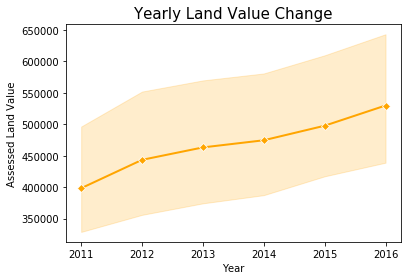

In [15]:
#Creating a graph that will show yearly change in Land Value
sns.lineplot(x = yearly_price_change["Year"], y = yearly_price_change["Assessed Land Value"], 
             marker ='D', linewidth=2, color = "Orange")
plt.title("Yearly Land Value Change", fontsize=15)
plt.show()



### HeatMap

In [ ]:
#Creating a HeatMap to show Neighborhoods Rent Rates  
locations = rent[["Lat", "Lng"]]
weights = rent["Avg Rent Rate"]
fig = gmaps.figure(map_type="SATELLITE")
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights, point_radius = 25))
fig

In [17]:
#Creating a HeatMap to show Neighborhoods Rent Rates  
fig = gmaps.figure()
locations = hp_and_rent_df[["Lat", "Lng"]]
weights2 = hp_and_rent_df["Yearly Rent Price"]
heat_layer = gmaps.heatmap_layer(locations, weights=weights2, 
                                 point_radius = 25, opacity = 0.7)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
#Creating a HeatMap to show Neighborhoods Assessed Land Value
fig = gmaps.figure()
locations = hp_and_rent_df[["Lat", "Lng"]]
weights = hp_and_rent_df["Assessed Land Value"]
heat_layer1 = gmaps.heatmap_layer(locations, weights=weights, point_radius = 15, 
                                  gradient = ["silver","navy"], opacity = 0.5)                                
fig.add_layer(heat_layer1)
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
#Combining two HeatMaps
fig = gmaps.figure()
fig = gmaps.figure(map_type="SATELLITE")
fig.add_layer(heat_layer)
fig.add_layer(heat_layer1)
fig

Figure(layout=FigureLayout(height='420px'))